# Declaration of Originality

![image.png](attachment:image.png)

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Foo Jing Heng Anson (2401482A)
* Tutorial Group                :  T07
* Tutor						    :  Ms Ester Goh
* Submission Date               : 11/02/26


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: Student depression is a increasing concern amongst schools and will negatively affect student's performance, well-being and even lead to undesirable consequences. Early identification of students at risk of depression allows instituitions to take action early and prevent tragedies from happening. This machine model aims to predict student's depression risk using various aspects such as pressure the student is facing, lifestyle, and academic related features.


# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "depression.csv"
# Load the dataset to understand its structure and identify relevant features
df = pd.read_csv(FILE_PATH);
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 2.2 Summary Statistics

In [4]:
## Display the first few rows of the dataset to understand its structure
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Justification: df.head() is used to understand the struture of the data which helps me verify whether the data has loaded properly and help me detect early obvious issues with the data such as unexpected symbols.


In [5]:
# Display dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Justification: df.info() is used for me to understand the diffrent data types and the number of non-null values so that I can identify any invalid data types. 

Intepretation: I found that the "Financial Stress" feature has a wrong data type as it should be float64 similar to "Academic Pressure" and "Work Pressure".

In [ ]:
df.describe(include='all')


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


Justification: df.describe() is used to help me analyse the data and detect anomalies, any extreme values and ensure data quality. 

Intepretation: The "Age" feature has a max of 59 which is a potential anomaly because the dataset is mostly students. There are also 2 high-cardinity features "City" with 52 unqiue values and "Degree" with 28 unique values which should be considered for dropping as doing one-hot encoding will significantly increase dimentionality and increase the risk of overfitting. Featurss such as "Job Satisfaction" and "Work Pressure" have a median and upper quatile of 0 which indicates very low or no variance. The target variable "Depression" has a mean of 0.585499 which suggest that the dataset is slightly inbalanced with more positive cases of depression than negative.

In [7]:
df['Financial Stress'].value_counts()


Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

Justification: I used this to check for the different values the 'Financial stress' feature had. 'Financial Stress' feature had 3 invalid placeholders which affected its data type which was converted to objects.

In [8]:
df['Financial Stress'] = pd.to_numeric(
    df['Financial Stress'],
    errors='coerce'
)

Justification: Converted all the values in the column to a number. If the value could not be converted, it will be converted to NaN (Not a number).


In [9]:
# Check for missing values and display missing percentage
missing_summary = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing Percentage (%)": df.isnull().mean() * 100
})
missing_summary

,Missing Count,Missing Percentage (%)
id,0,0.000000
Gender,0,0.000000
Age,0,0.000000
City,0,0.000000
Profession,0,0.000000
Academic Pressure,0,0.000000
Work Pressure,0,0.000000
CGPA,0,0.000000
Study Satisfaction,0,0.000000
Job Satisfaction,0,0.000000


Justification: There are missing values in the "Financial Stress" column which needs to be processed to ensure data quality.

In [10]:
df = df.dropna(subset=['Financial Stress'])
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

Justification: Since the missing values for "Financial Stress" feature is only 3 and the missing percentage is 0.010752%, the entries were removed rather than imputed. This method avoided adding artificial values into the column while having negligible impact on the data distribution of the feature and the overall dataset.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

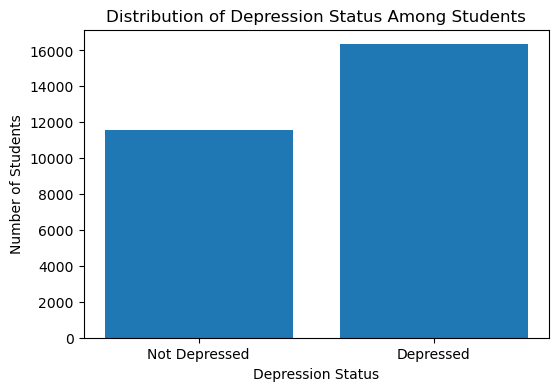

In [11]:
# Understanding Distribution of the target (Depression)
counts = df['Depression'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Distribution of Depression Status Among Students")
plt.xlabel("Depression Status")
plt.ylabel("Number of Students")
plt.xticks([0, 1], ["Not Depressed", "Depressed"])
plt.show()

Intepretation: The distribution of the target variable shows a slight class inbalance between depressed or not depressed  This inbalance in the classes indicates that there are more depressed students than not depressed students and if this data is used to train the model without addressing this class inbaalance, the model may become biased towards the majority class. This suggest that solely relying on accuracy metric may be misleading and therefore precision, recall and f1-score must be considered too as they account for the class inbalance. Recall is a metric that is important here as it focuses on the false negatives as identifying a depressed student in this context is very important.

### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection